<a href="https://colab.research.google.com/github/damodhar92/Guvi-Tasks/blob/main/Task_6%20(Assignment8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape

(804, 12)

In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

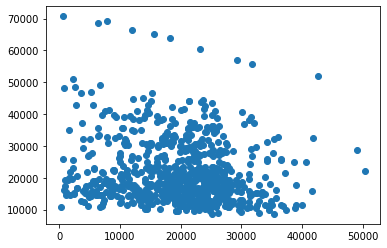

In [8]:
plt.scatter(df['Mileage'],df['Price'])

In [9]:
df['logprice'] = np.log(df['Price'])
df['logmileage'] = np.log(df['Mileage'])

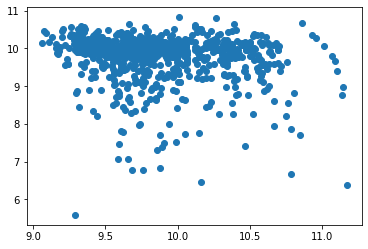

In [10]:
plt.scatter(df['logprice'], df['logmileage'])

In [11]:
x = df[["Price"]]
y = df[["Mileage"]]

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)
reg.fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Mileage
Feature names seen at fit time, yet now missing:
- Price

  warnings.warn(message, FutureWarning)


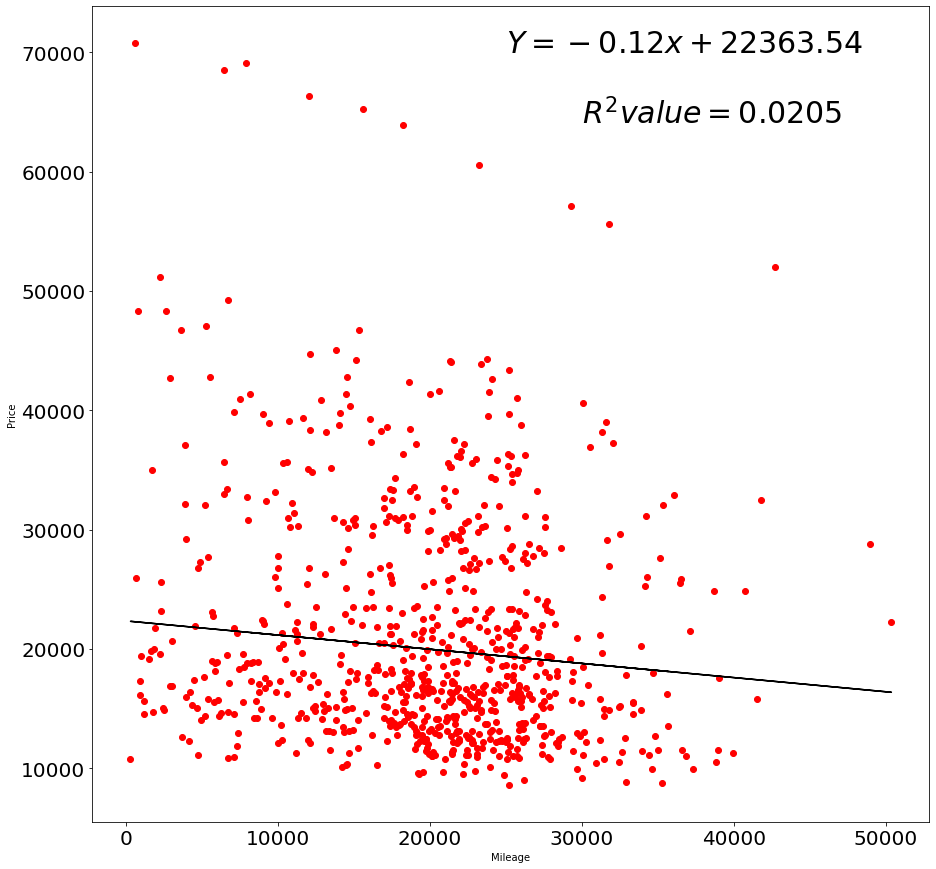

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.scatter(y, x, color='red') 
plt.plot(y, reg.predict(y), color='black')
plt.text(25000, 70000, '$Y = %.2fx + %.2f$' % (reg.coef_, reg.intercept_), fontsize=30)
plt.text(30000, 64000, '$R^2 value = %.4f$'% reg.score(x, y), fontsize=30)
plt.ylabel("Price")
plt.xlabel('Mileage')
plt.show()

In [14]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [15]:
df['Model'].value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [16]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [17]:
replacer = {'Coupe': 5, 'Convertible': 4, 'Hatchback': 3, 'Sedan': 2, 'Wagon': 1 }


In [18]:
df['Type'] = df['Type'].replace(replacer)

In [19]:
df['Type'].value_counts()

2    490
5    140
1     64
3     60
4     50
Name: Type, dtype: int64

In [21]:
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,logprice,logmileage
0,17314.103129,8221,Buick,Century,Sedan 4D,2,6,3.1,4,1,1,1,9.759277,9.014447
1,17542.036083,9135,Buick,Century,Sedan 4D,2,6,3.1,4,1,1,0,9.772355,9.119868
2,16218.847862,13196,Buick,Century,Sedan 4D,2,6,3.1,4,1,1,0,9.693929,9.487669
3,16336.913140,16342,Buick,Century,Sedan 4D,2,6,3.1,4,1,0,0,9.701182,9.701494
4,16339.170324,19832,Buick,Century,Sedan 4D,2,6,3.1,4,1,0,1,9.701321,9.895052


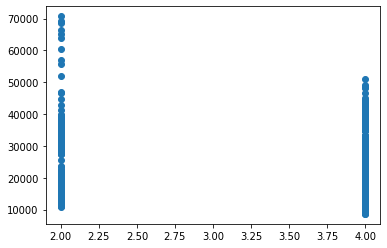

In [22]:
plt.scatter(df['Doors'], df['Price'])

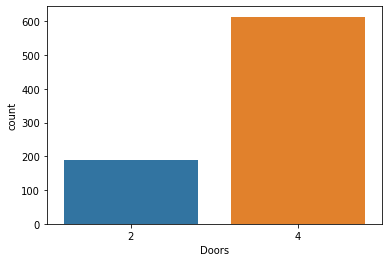

In [23]:
sns.countplot(x='Doors', data=df)

In [24]:
features = ['Mileage', 'Type','Cylinder','Liter','Doors','Cruise','Sound','Leather']


In [25]:
X1 = df[features]
Y1 = df['Price']

reg2 = LinearRegression()
reg2.fit(X1,Y1)

LinearRegression()

In [26]:
X1 = df[features]
Y1 = df['Price']

reg2 = LinearRegression()
reg2.fit(X1,Y1)

LinearRegression()

In [27]:
reg2.score(X1,Y1)

0.6079517130983807

In [28]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor( learning_rate = 1, n_estimators = 50)
abr.fit(X1,Y1)

AdaBoostRegressor(learning_rate=1)

In [29]:
abr.score(X1,Y1)

0.7484193246652933

In [30]:
df = pd.read_csv("car_data.csv")

In [31]:
dummy_df = pd.get_dummies(df, columns=['Make','Type'])

In [32]:
dummy_df.drop(['Trim', 'Model'], axis=1, inplace=True)

In [33]:
dummy_df_columns = list(dummy_df.columns)

In [34]:
dummy_df.shape

(804, 19)

In [35]:
drop = ['Leather','Price','Sound']

In [36]:
X = dummy_df.drop(drop,axis =1)
Y = dummy_df['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)

In [39]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [40]:
reg2.score(X1,Y1)

0.6079517130983807

In [41]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor( learning_rate = 1, n_estimators = 50)
abr.fit(X1,Y1)

AdaBoostRegressor(learning_rate=1)

In [42]:
df = pd.read_csv("car_data.csv")

In [43]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [44]:
dummy_df = pd.get_dummies(df, columns=['Make','Type'])
dummy_df.drop(['Trim', 'Model'], axis=1, inplace=True)
dummy_df_columns = list(dummy_df.columns)
dummy_df.shape

(804, 19)

In [45]:
drop = ['Leather','Price','Sound']

In [46]:
X = dummy_df.drop(drop,axis =1)
Y = dummy_df['Price']

In [47]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [48]:
X.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Make_Buick',
       'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB',
       'Make_Saturn', 'Type_Convertible', 'Type_Coupe', 'Type_Hatchback',
       'Type_Sedan', 'Type_Wagon'],
      dtype='object')

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state=5)

In [55]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(X_train,Y_train)
reg3.score(X_train,Y_train)

0.9383968628962248

In [56]:
reg3.score(X_test,Y_test)

0.9278350243134883

In [57]:
reg3.coef_

array([-1.93029531e-01, -1.31613808e+03,  5.73399118e+03, -2.03657984e+03,
        9.56940761e+01, -3.42534951e+03,  1.26443498e+04, -5.42928601e+03,
       -5.40533279e+03,  6.64958211e+03, -5.03396358e+03,  6.52545196e+03,
       -5.50716204e+03, -1.48880210e+03, -1.75568913e+03,  2.22620131e+03])

In [58]:
reg3.score(X_test,Y_test)

0.9278350243134883

In [59]:
ridge_reg = linear_model.Ridge(alpha = 1, tol=0.001, solver='auto' )
ridge_reg.fit(X_train,Y_train)
ridge_reg.score(X_train,Y_train)

0.9382214980448086

In [60]:
ridge_reg.score(X_test,Y_test)

0.9276857030604224

In [61]:
ridge_reg.coef_

array([-1.93092346e-01, -9.94372452e+02,  5.39619948e+03, -2.02851661e+03,
        1.36813009e+02, -3.38665110e+03,  1.22066696e+04, -5.35073631e+03,
       -5.36146843e+03,  6.73881733e+03, -4.84663112e+03,  6.40432625e+03,
       -5.39006794e+03, -1.54767651e+03, -1.72480404e+03,  2.25822224e+03])

In [62]:
lasso_reg = linear_model.Lasso(alpha=0.1, max_iter=100000, tol=0.001)
lasso_reg.fit(X_train,Y_train)
lasso_reg.score(X_train,Y_train)

0.9383968416957224

In [63]:
lasso_reg.score(X_test,Y_test)

0.9278367359778139

In [64]:
lasso_reg.coef_

array([-1.93024826e-01, -1.31221684e+03,  5.72988521e+03, -5.52210722e+02,
        9.53566200e+01,  0.00000000e+00,  1.60670822e+04, -2.00195536e+03,
       -1.97824737e+03,  1.00780069e+04, -1.60550457e+03,  1.09823429e+04,
       -1.04712766e+03, -0.00000000e+00, -2.65094483e+02,  3.71548074e+03])

from the co-efficients we can observe that Lasso and ordinary least square are giving more importance to certain features but ridge regressor has a balanced and considerable intercept distribution. Though the score from all 3 regressors is coming same but i would prefer Ridge regressor for my prediction.

In [65]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train,Y_train)
ada_reg.score(X_train,Y_train)

0.9234904729304353

In [66]:
ada_reg.score(X_test,Y_test)

0.9229892942336708

In [67]:
import itertools

In [68]:
replacer = {'Coupe': 5, 'Convertible': 4, 'Hatchback': 3, 'Sedan': 2, 'Wagon': 1 }
df['Type'] = df['Type'].replace(replacer)

In [69]:
from itertools import combinations

combos = []

for i in range(1,8):
  combos.append(itertools.combinations(dummy_df_columns,i))

In [70]:
combos

In [71]:
combos1 = []

for i in range(11):
  combos1.append(itertools.combinations(features,i))

In [72]:
for i in combos1:
  for j in i:
    j = list(j)
    x = df[j]
    y = df['Price']

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline, preprocessing

degree = 6
for i in range(degree):
  model = pipeline.Pipeline([('poly', preprocessing.PolynomialFeatures(degree=degree)),
                             ('linear', linear_model.LinearRegression(fit_intercept=False))])
  model = model.fit(x,y)

In [74]:
check = 0
score = model.score(x,y)
if score < model.score(x,y):
  score = model.score(x,y)
  j = j
  degree = degree


print(degree, score, j)

6 -0.40933624697997995 ['Mileage', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
